# Explore the Dataset and Initiate to use MNE Python Library


**Description**:\
In the following notebook, you'll find a brief exploration of the files in the dataset, and a simple initial work using the MNE Python library created to work with EEG Data.

**Author**: Elmo Chavez\
**Date**: October 8, 2023


## Libraries


In [1]:
import os
import mne
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read the Data


**Make sure you select the directory where you have previously downloaded the EEG Dataset from Open Neuro**


In [2]:
# Set the path where the EEG Data was loaded
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))+"/ds004504"

### Explore Dataset Directory


In [3]:
# List all the items contained
items = os.listdir(path)

# Explore files in root path
files = [item for item in items if os.path.isfile(os.path.join(path, item))]
files.sort()

# Explore directories in root path
directories = [item for item in items if os.path.isdir(os.path.join(path, item))]
directories.sort()

print("# Files:", len(files), "||", "# Directories:", len(directories))
print("--------")
print("Files:", files)
print("Directories:", directories[:15])

# Files: 6 || # Directories: 89
--------
Files: ['.DS_Store', 'CHANGES', 'README', 'dataset_description.json', 'participants.json', 'participants.tsv']
Directories: ['derivatives', 'sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014']


## Explore Participants Information


Obtanined from `participants.tsv` in the EEG Dataset `ds004504` directory

In [4]:
filename_participants = "participants.tsv"
df_participants = pd.read_csv(path + "/" + filename_participants, sep="\t")
df_participants.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


Number of Participants by Group


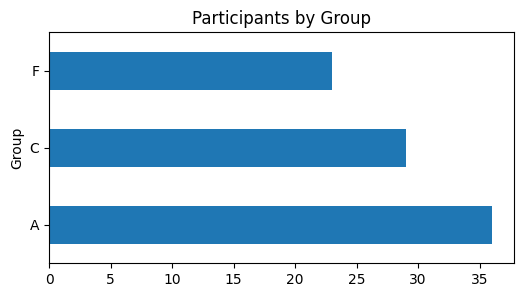

In [5]:
df_participants.groupby("Group")["participant_id"].count().plot(
    kind="barh", figsize=(6, 3), title="Participants by Group"
)
plt.show()

Participants' Age distribution by Group


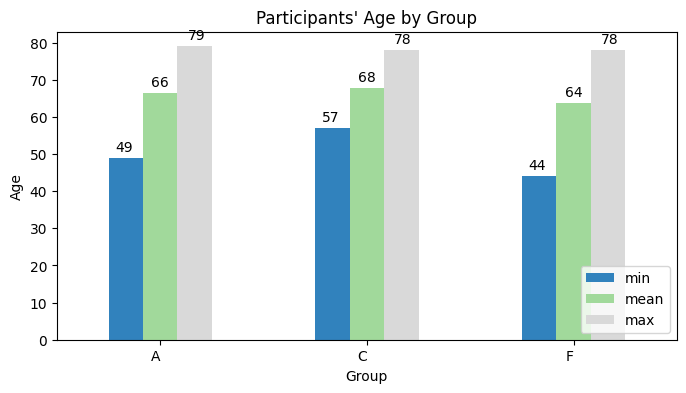

In [6]:
# Calculate the Min, Mean and Max values for each Age's group
df_age_sum = df_participants.groupby("Group")["Age"].agg(["min", "mean", "max"])

# Plot
bar_width = 0.175
df_age_sum.plot(kind="bar", figsize=(8, 4), colormap="tab20c")
plt.title("Participants' Age by Group")
plt.xlabel("Group")
plt.xticks(rotation=0, ha="right")
plt.ylabel("Age")
plt.legend(loc="lower right")

# Bar Labels
for i, (v1, v2, v3) in enumerate(
    zip(df_age_sum["min"].values, df_age_sum["mean"].values, df_age_sum["max"].values)
):
    plt.text(
        i - bar_width, v1 + 1, str(round(v1)), ha="center", va="bottom", fontsize=10
    )
    plt.text(i, v2 + 1, str(round(v2)), ha="center", va="bottom", fontsize=10)
    plt.text(
        i + bar_width, v3 + 1, str(round(v3)), ha="center", va="bottom", fontsize=10
    )

plt.show()

## Exploring EEG Datasets


Exploring Derivatives Directory


In [7]:
path_derivatives = path + "/" + "derivatives"
items = os.listdir(path_derivatives)

# Explore directories in root path
directories = [item for item in items if os.path.isdir(os.path.join(path, item))]
directories.sort()
print("Number of items in Directory = /derivates", len(directories))
print("Directories in /derivatives:", directories[:15])

Number of items in Directory = /derivates 88
Directories in /derivatives: ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015']


**Context**\
For each participant, there are two EEG files in the dataset. The first one is in the "sub-0XX" directory, where we can find the Unpreprocessed EEG recordings. The second one is in the /derivatives directory within another directory with the same name as the first one, where the EEG recordings have already undergone preprocessing through the EEGLab MatLab software. More details can be found in the Project Documentation.


### Unpreprocessed EEG - Subject 001


In [8]:
eeg_path1 = path + "/" + "sub-001/eeg"
sub001_files = os.listdir(eeg_path1)
print(sub001_files)

['sub-001_task-eyesclosed_eeg.json', 'sub-001_task-eyesclosed_channels.tsv', 'sub-001_task-eyesclosed_eeg.set']


In [9]:
path1 = path + "/" + "sub-001/eeg"
sub001_task_eyesclsd_json = pd.read_json(path1 + "/" + sub001_files[0])
sub001_task_eyesclsd_tsv = pd.read_csv(path1 + "/" + sub001_files[1], sep="\t")
sub001_raw = mne.io.read_raw_eeglab(
    path1 + "/" + sub001_files[2], preload=False, verbose="CRITICAL"
)

In [10]:
sub001_task_eyesclsd_json

,PowerLineFrequency,SoftwareFilters,EEGPlacementScheme,EEGReference,CapManufacturersModelName,CapManufacturer,InstitutionAddress,InstitutionalDepartmentName,InstitutionName,TaskName,EEGChannelCount,RecordingType,RecordingDuration,SamplingFrequency,EOGChannelCount,ECGChannelCount,EMGChannelCount
FilterDescription,50,{'Description': '0.4 - 50'},10-20,A1 A2,EEG 2100,Nihon Kohden,"Arta, Greece",Department of Informatics and Telecommunications,University of Ioannina,eyesclosed,19,continuous,599.8,500,0,0,0


In [11]:
sub001_task_eyesclsd_tsv

,name,type,units
0,Fp1,EEG,microV
1,Fp2,EEG,microV
2,F3,EEG,microV
3,F4,EEG,microV
4,C3,EEG,microV
5,C4,EEG,microV
6,P3,EEG,microV
7,P4,EEG,microV
8,O1,EEG,microV
9,O2,EEG,microV


In [12]:
sub001_raw

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

**Using MNE to explore the EEG Recording**


Get a summary for each channel


In [13]:
sub001_raw.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -466.11     -78.71     -11.18      57.08    1192.97
 1  Fp2   EEG   µV      -423.54     -82.47     -16.85      43.12    2879.64
 2  F3    EEG   µV      -318.95     -71.69     -20.56      30.66     240.28
 3  F4    EEG   µV      -171.29      73.13     121.09     168.31     442.43
 4  C3    EEG   µV      -280.81     -66.50     -23.54      18.90     243.80
 5  C4    EEG   µV      -288.23     -23.93      21.68      66.02     347.22
 6  P3    EEG   µV      -242.87     -18.02      27.59      72.36     278.76
 7  P4    EEG   µV      -203.27      35.69      92.97     150.34     452.98
 8  O1    EEG   µV      -249.02      70.02     155.42     268.55     710.30
 9  O2    EEG   µV      -292.38     -38.82      19.48      88.33     439.11
10  F7    EEG   µV      -350.68     -64.79     -13.04      38.53     302

Plot the first 50 seconds wavelengths for each channel


Using matplotlib as 2D backend.


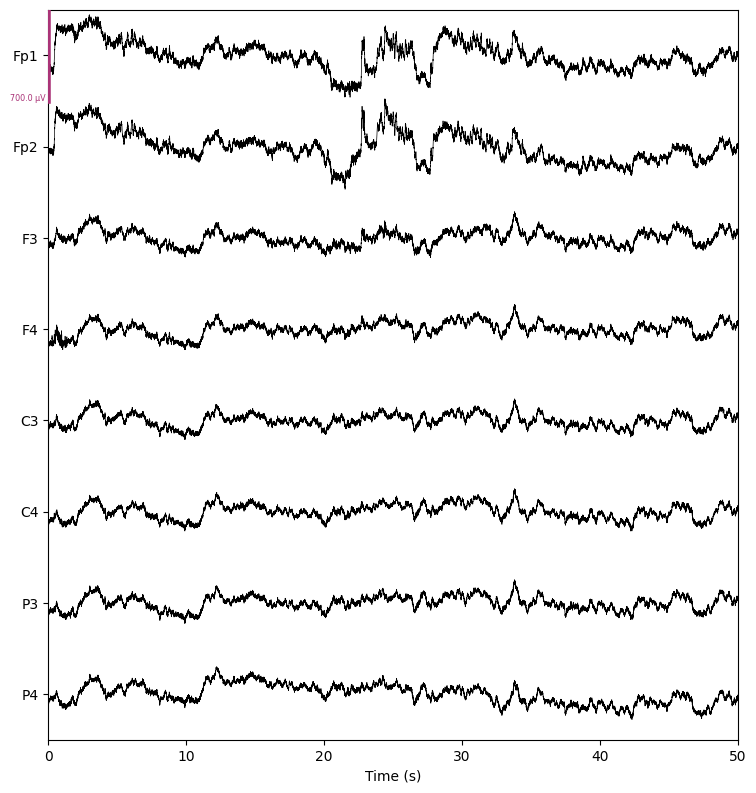

In [14]:
fig = sub001_raw.plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=3.5e-4), duration=50, n_channels=8
)
plt.show()

Compute the PSD


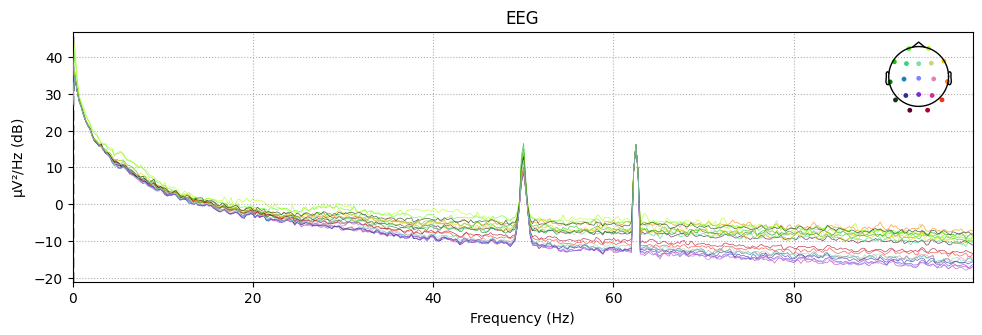

In [15]:
fig = sub001_raw.compute_psd(fmax=100, verbose="CRITICAL").plot(
    picks="data", exclude="bads"
)
plt.show()

### Preprocessed EEG - Subject 001


In [16]:
eeg_path1_prep = path_derivatives + "/" + "sub-001/eeg"
sub001_prep_files = os.listdir(eeg_path1_prep)
print(sub001_prep_files)

['sub-001_task-eyesclosed_eeg.set']


In [17]:
sub001_prep_raw = mne.io.read_raw_eeglab(
    eeg_path1_prep + "/" + sub001_prep_files[0], preload=False, verbose="CRITICAL"
)
sub001_prep_raw

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Get a summary for each channel


In [18]:
sub001_prep_raw.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -161.52     -21.98       0.20      22.28     143.65
 1  Fp2   EEG   µV      -137.61     -21.79       0.29      22.22     148.81
 2  F3    EEG   µV      -126.39     -21.31       0.34      21.33     140.30
 3  F4    EEG   µV      -126.99     -21.21       0.38      21.46     149.70
 4  C3    EEG   µV      -126.59     -21.16       0.51      21.34     139.82
 5  C4    EEG   µV      -128.02     -21.16       0.47      21.42     145.65
 6  P3    EEG   µV      -124.71     -21.44       0.43      21.53     143.70
 7  P4    EEG   µV      -126.30     -21.42       0.45      21.61     137.40
 8  O1    EEG   µV      -127.03     -21.79       0.57      21.54     146.38
 9  O2    EEG   µV      -128.01     -21.88       0.35      21.90     152.92
10  F7    EEG   µV      -125.56     -21.20       0.27      21.63     139

Plot the first 50 seconds wavelengths for each channel


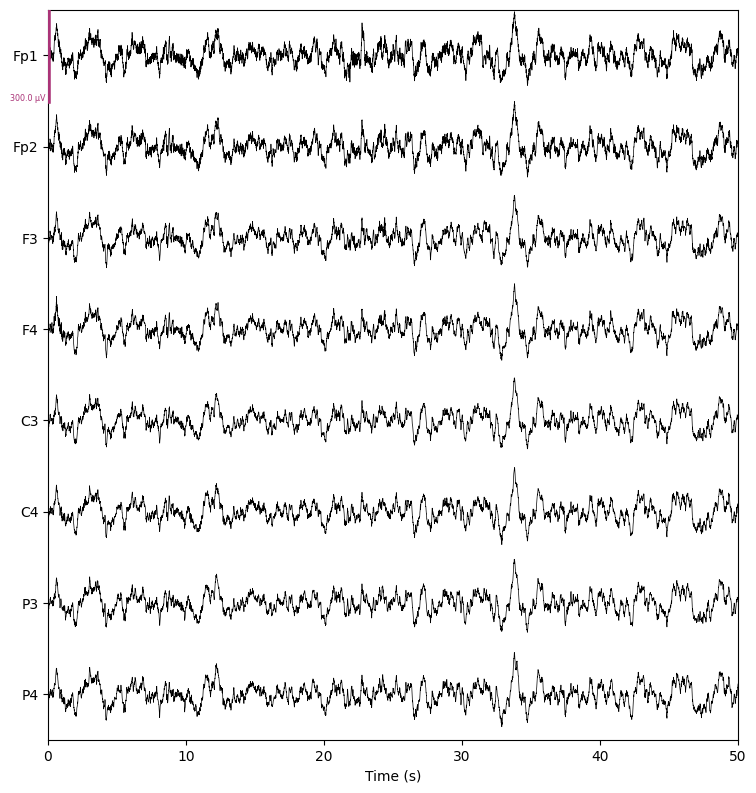

In [19]:
fig = sub001_prep_raw.plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), duration=50, n_channels=8
)
plt.show()

Compute the PSD


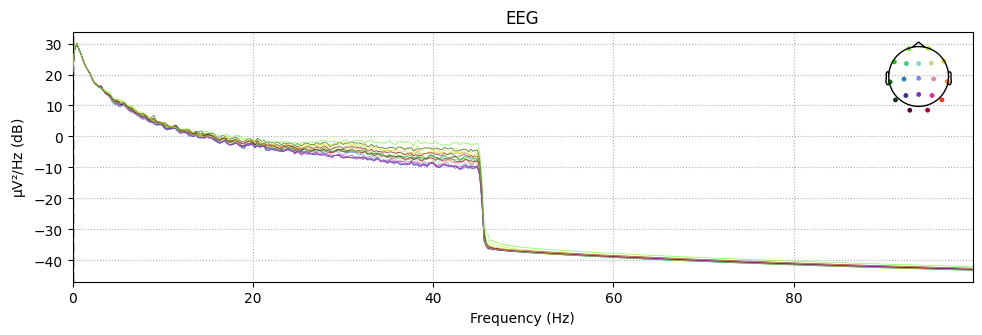

In [20]:
fig = sub001_prep_raw.compute_psd(fmax=100, verbose="CRITICAL").plot(
    picks="data", exclude="bads"
)
plt.show()

## Conclusion


Upon reviewing the directory of subject datasets, the following findings were discovered:

- The dataset includes a ".tsv" text file containing Gender, Age, MMSE test score, and Disorder Group information for each subject.
- The distribution of recordings among groups is inconsistent, so taking a similar number of samples is necessary to prevent overfitting in modeling.
- For each subject, there are two files containing EEG recordings. One of the files contains the raw data as recorded, while the other has been preprocessed using the EEGLab software from the MatLab tool. This software allows for the application of band filters, removal of artifacts, and elimination of eye movement noise using the RunICA method.
- After preprocessing the data, changes in signal amplitude, and frequency filtering in the PSD are noticeable
